In [46]:
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
challenger_data = pd.read_csv('/challenger_data.csv', index_col='Date')

In [48]:
challenger_data = challenger_data.dropna(subset=['Damage Incident'], axis=0)
drop_index = challenger_data.index[(challenger_data['Damage Incident']=='Challenger Accident')]
challenger_data = challenger_data.drop(drop_index)

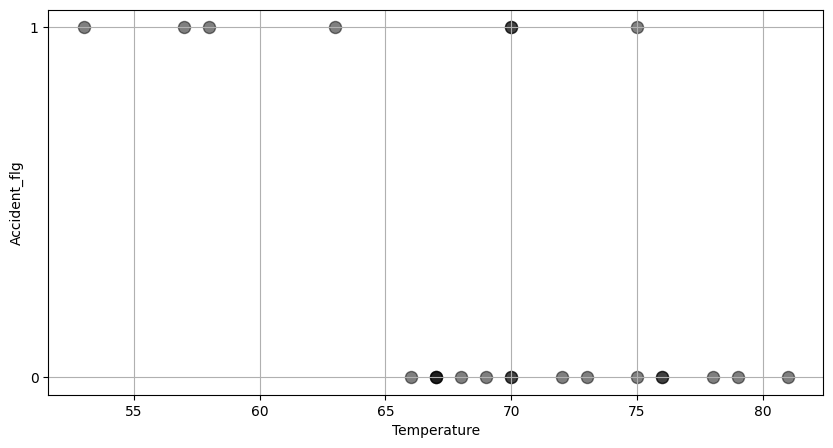

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(challenger_data['Temperature'], challenger_data['Damage Incident'], s=75, color='k', alpha=0.5)
plt.grid()
plt.xlabel('Temperature')
plt.ylabel('Accident_flg')
plt.show()

In [51]:
#一般化ロジスティックモデルの実装

In [97]:
temperature = challenger_data['Temperature']
D = challenger_data['Damage Incident']

In [99]:
D = D.astype('float32')

In [100]:
with pm.Model() as model:
  beta = pm.Normal("beta", mu=0, sigma=10)
  alpha = pm.Normal("alpha", mu=0, sigma=10)
  mu = pm.Deterministic('mu', alpha + pm.math.dot(temperature, beta))
  theta = pm.Deterministic('theta', 1/(1+pm.math.exp(-mu)))
  y_pred = pm.Bernoulli('y_pred',p=theta,observed=D)

In [101]:
with model:
  trace = pm.sample(10000, chains=2, cores=1)

Output()

Output()

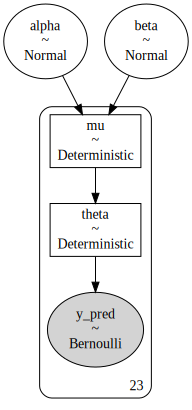

In [102]:
#可視化
import arviz as az
g = pm.model_to_graphviz(model)
display(g)

In [103]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,11.736,5.432,1.941,22.366,0.100,0.072,2942.0,2896.0,1.0
beta,-0.185,0.080,-0.330,-0.031,0.001,0.001,2941.0,2862.0,1.0
mu[0],-0.460,0.561,-1.498,0.612,0.005,0.004,12613.0,11851.0,1.0
mu[1],-1.199,0.574,-2.289,-0.150,0.005,0.004,12824.0,12716.0,1.0
mu[2],-1.014,0.554,-2.057,0.001,0.004,0.003,16251.0,14210.0,1.0
mu[3],-0.830,0.545,-1.851,0.184,0.004,0.003,17581.0,14064.0,1.0
mu[4],-0.645,0.547,-1.665,0.384,0.004,0.003,15788.0,12804.0,1.0
mu[5],-1.569,0.642,-2.800,-0.413,0.007,0.005,8004.0,10760.0,1.0
mu[6],-1.754,0.688,-3.048,-0.504,0.009,0.006,6677.0,9562.0,1.0
mu[7],-1.199,0.574,-2.289,-0.150,0.005,0.004,12824.0,12716.0,1.0


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

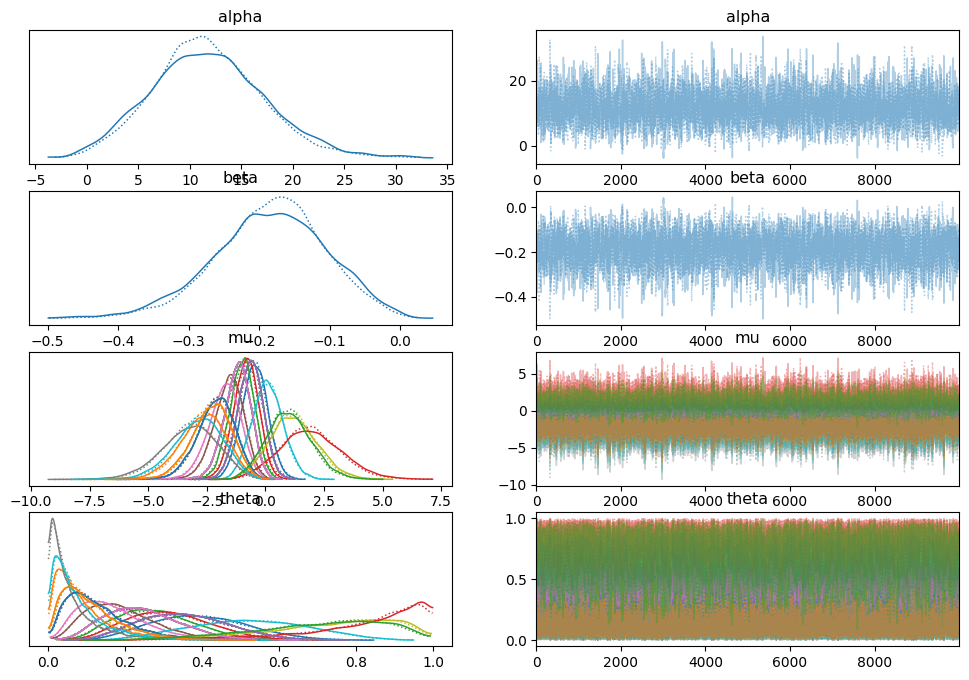

In [104]:
az.plot_trace(trace)